# Load Data

In [58]:
import pandas as pd
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
import csv
import re
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

df=pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\DMTA\olid-training-v1.0.tsv',sep='\t', encoding="utf-8",quotechar='\0')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"""@USER Someone should'veTaken"""" this piece of ...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [60]:
df

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"""@USER Someone should'veTaken"""" this piece of ...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND


# Data Preparation

In [61]:
def preparation(df):

    #Convert to lower case
    df['tweet']=df['tweet'].str.lower()

    for i in range(0,len(df['tweet'])):
        print(i)
        #Removal of User Id
        df['tweet'][i] = re.sub("user", "", df['tweet'][i])

        #Removal of URL
        df['tweet'][i] = re.sub("url", "", df['tweet'][i])

        #Converting emojis to corresponding words
        df['tweet'][i]=emoji.demojize(df['tweet'][i], delimiters=(""," "))
        
        #Removal of Punctuations
#         df['tweet'][i] = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\"\’\']", " ", df['tweet'][i]).split())
        df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]"," ")

        


    #Remove words with length less the 3
    df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    df['tidy_tweet']=df['tweet']
    df.update("'" + df[['tweet']].astype(str) + "'")
    
    return df


df['subtask_c'].fillna("NULL",inplace = True)
df['subtask_b'].fillna("NULL",inplace = True)
df=preparation(df)
# df.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_updated_tweet.arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')

# Plot Graph for Targets

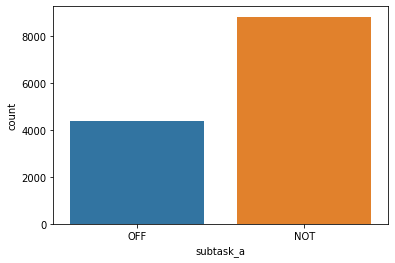

In [5]:
def graph_subtask(subtask):
    df[subtask].value_counts(normalize=True)*100
    sns.countplot(x=subtask, data=df)

graph_subtask('subtask_a')


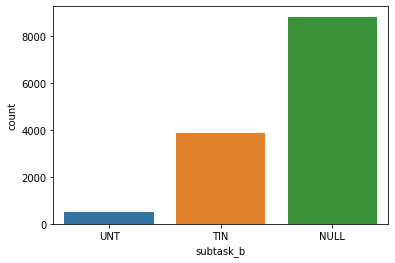

In [6]:
graph_subtask('subtask_b')

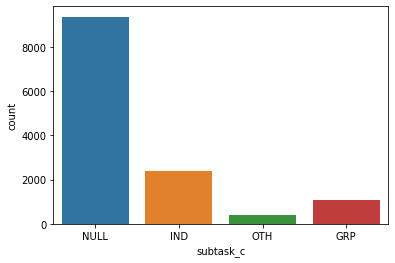

In [7]:
graph_subtask('subtask_c')

In [8]:
df

,id,tweet,subtask_a,subtask_b,subtask_c,tidy_tweet
0,86426,'should native americans what their take this',OFF,UNT,NULL,should native americans what their take this
1,90194,'home drunk #maga #trump',OFF,TIN,IND,home drunk #maga #trump
2,16820,'amazon investigating chinese employees sellin...,NOT,NULL,NULL,amazon investigating chinese employees selling...
3,62688,'someone should vetaken this piece shit volcano',OFF,UNT,NULL,someone should vetaken this piece shit volcano
4,43605,'obama wanted liberals illegals move into states',NOT,NULL,NULL,obama wanted liberals illegals move into states
5,97670,'liberals kookoo',OFF,TIN,OTH,liberals kookoo
6,77444,'noes tough shit',OFF,UNT,NULL,noes tough shit
7,52415,'literally just talking about this mass shooti...,OFF,TIN,GRP,literally just talking about this mass shootin...
8,45157,'more icecream',NOT,NULL,NULL,more icecream
9,13384,'canada doesn need another cuck already have e...,OFF,TIN,IND,canada doesn need another cuck already have en...


# Remove Stop Words

In [9]:
def remove_stopwords(df):
    nltk.download('stopwords')

    df_without_stopwords = pd.DataFrame(columns=['tidy_tweet','subtask_a','subtask_b','subtask_c'])
    without_wordlist=[]
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    for i in range(len(df)):
        querywords = df['tidy_tweet'][i].split()
        resultwords  = [word for word in querywords if word.lower() not in stop_words]
        without_wordlist.append(' '.join(resultwords))

    df_without_stopwords['tidy_tweet'] = without_wordlist
    df_without_stopwords['subtask_a']=df['subtask_a']
    df_without_stopwords['subtask_b']=df['subtask_b']
    df_without_stopwords['subtask_c']=df['subtask_c']
    return df_without_stopwords


In [10]:
df_without_stopwords=remove_stopwords(df)
df['tidy_tweet']=df_without_stopwords['tidy_tweet']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming and Lemmatization

In [11]:
def Tokenize(df_stemming,df_without_stopwords):
    df_stemming['tokenized']=df_without_stopwords['tidy_tweet'].apply(lambda x: x.split())
    
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def WordTokenize(df_stemming,df_without_stopwords):
    df_stemming['word_tokenize']=df_without_stopwords['tidy_tweet'].apply(lambda x: stemSentence(x))
     
def SnowballStemmer1(df_stemming,df_without_stopwords):
    englishStemmer=SnowballStemmer("english")
    df_stemming['SnowballStemmer123']=df_without_stopwords['tidy_tweet'].apply(lambda x: englishStemmer.stem(x))
    
def Porter(df_stemming,df_without_stopwords):
    porter = PorterStemmer()
    df_stemming['Porter']=df_without_stopwords['tidy_tweet'].apply(lambda x: porter.stem(x))

def Lancaster(df_stemming,df_without_stopwords):
    lancaster=LancasterStemmer()
    df_stemming['Lancaster']=df_without_stopwords['tidy_tweet'].apply(lambda x: lancaster.stem(x))
    
def Lemmatizer(df_stemming,df_without_stopwords):
    lemmatizer = WordNetLemmatizer() 
    df_stemming['Lemmatized']=df_without_stopwords['tidy_tweet'].apply(lambda x: lemmatizer.lemmatize(x))

def StemmingAndLemma(df_stemming,df_without_stopwords):
    #Word Tokenize using word_tokenize    
    WordTokenize(df_stemming,df_without_stopwords)

    #SnowballStemmer
    SnowballStemmer1(df_stemming,df_without_stopwords)

    #Tokenizer
    Tokenize(df_stemming,df_without_stopwords)

    #Porter Stemmer
    Porter(df_stemming,df_without_stopwords)

    #Lancaster Stemmer
    Lancaster(df_stemming,df_without_stopwords)

    #Lemmatizer 
    Lemmatizer(df_stemming,df_without_stopwords)

    return df_stemming

df_stemming=pd.DataFrame()
df_stemming['tidy_tweet']=df_without_stopwords['tidy_tweet']

df_stemming=StemmingAndLemma(df_stemming,df_without_stopwords)
df_stemming

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home drunk #maga #trump,home drunk # maga # trump,home drunk #maga #trump,"[home, drunk, #maga, #trump]",home drunk #maga #trump,home drunk #maga #trump,home drunk #maga #trump
2,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employees selling...,"[amazon, investigating, chinese, employees, se...",amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...
3,someone vetaken piece shit volcano,someon vetaken piec shit volcano,someone vetaken piece shit volcano,"[someone, vetaken, piece, shit, volcano]",someone vetaken piece shit volcano,someone vetaken piece shit volcano,someone vetaken piece shit volcano
4,obama wanted liberals illegals move states,obama want liber illeg move state,obama wanted liberals illegals move st,"[obama, wanted, liberals, illegals, move, states]",obama wanted liberals illegals move st,obama wanted liberals illegals move states,obama wanted liberals illegals move states
5,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
6,noes tough shit,noe tough shit,noes tough shit,"[noes, tough, shit]",noes tough shit,noes tough shit,noes tough shit
7,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
8,icecream,icecream,icecream,[icecream],icecream,icecream,icecream
9,canada need another cuck already enough #loone...,canada need anoth cuck alreadi enough # looney...,canada need another cuck already enough #loone...,"[canada, need, another, cuck, already, enough,...",canada need another cuck already enough #loone...,canada need another cuck already enough #loone...,canada need another cuck already enough #loone...


# Remove words having frequency less than 3 from each Stemmed and Lematized Tweet

In [12]:
from collections import defaultdict  # available in Python 2.5 and newer

def get_frequency_of_words(df_stemming,column_name):
    print('ddfddddf',column_name)
    Tweet_list=df_stemming[column_name]
    Dictionary_Tweet= defaultdict(int)
    Tweet_word_list=[]
    def update(i):
        Dictionary_Tweet[i] += 1
    [[ update(i) for i in tweet.split()] for tweet in Tweet_list]

    for key,value in Dictionary_Tweet.items():
        if value>3:
            Tweet_word_list.append(key)
    return Tweet_word_list

def remove_words_from_tweet(df_stemming,columnname,word_list):
    for i in range(len(df_stemming[columnname])):
        resultwords = [word for word in df_stemming[columnname][i].split() if word in word_list]
        if len(resultwords)!=0:
            df_stemming[columnname][i] = ' '.join(resultwords)
    return df_stemming

In [13]:

def frequency(df_stemming):
    #Get words with minimun 3 frequency for all stemming types
    tidy_tweet_list=get_frequency_of_words(df_stemming,'tidy_tweet')
    df_stemming=remove_words_from_tweet(df_stemming,'tidy_tweet',tidy_tweet_list)

    word_tokenize_list=get_frequency_of_words(df_stemming,'word_tokenize')
    df_stemming=remove_words_from_tweet(df_stemming,'word_tokenize',word_tokenize_list)

    SnowballStemmer123_list=get_frequency_of_words(df_stemming,'SnowballStemmer123')
    df_stemming=remove_words_from_tweet(df_stemming,'SnowballStemmer123',SnowballStemmer123_list)

    Porter_list=get_frequency_of_words(df_stemming,'Porter')
    df_stemming=remove_words_from_tweet(df_stemming,'Porter',Porter_list)

    Lancaster_list=get_frequency_of_words(df_stemming,'Lancaster')
    df_stemming=remove_words_from_tweet(df_stemming,'Lancaster',Lancaster_list)

    Lemmatized_list=get_frequency_of_words(df_stemming,'Lemmatized')
    df_stemming=remove_words_from_tweet(df_stemming,'Lemmatized',Lemmatized_list)
    
    return df_stemming
df_stemming=frequency(df_stemming)

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


# Final Upated Tweet's For Subtask A

In [14]:
df['tidy_tweet_updated']=df_stemming['tidy_tweet']
df['word_tokenize']=df_stemming['word_tokenize']
df['SnowballStemmer123']=df_stemming['SnowballStemmer123']
df['Porter']=df_stemming['Porter']
df['Lancaster']=df_stemming['Lancaster']
df['Lemmatized']=df_stemming['Lemmatized']
df.update("'" + df[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
del df['id']
df

,subtask_a,subtask_b,subtask_c,tidy_tweet,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,OFF,UNT,NULL,'native americans','native americans','nativ american','native american','native american','native americans','native americans'
1,OFF,TIN,IND,'home drunk #maga #trump','home drunk #maga #trump','home drunk # maga # trump','home drunk #maga #trump','home drunk #maga #trump','home drunk #maga #trump','home drunk #maga #trump'
2,NOT,NULL,NULL,'amazon investigating chinese employees sellin...,'amazon chinese employees selling data third p...,'amazon investig chines employe sell intern da...,'amazon chinese employees selling data third p...,'amazon chinese employees selling data third p...,'amazon chinese employees selling data third p...,'amazon chinese employees selling data third p...
3,OFF,UNT,NULL,'someone vetaken piece shit volcano','someone piece shit','someon piec shit','someone piece shit','someone piece shit','someone piece shit','someone piece shit'
4,NOT,NULL,NULL,'obama wanted liberals illegals move states','obama wanted liberals illegals move states','obama want liber illeg move state','obama wanted liberals illegals move st','obama wanted liberals illegals move st','obama wanted liberals illegals move states','obama wanted liberals illegals move states'
5,OFF,TIN,OTH,'liberals kookoo','liberals','liber','liberals','liberals','liberals','liberals'
6,OFF,UNT,NULL,'noes tough shit','tough shit','tough shit','tough shit','tough shit','tough shit','tough shit'
7,OFF,TIN,GRP,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'liter talk mass shoot propaganda use divid ma...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...
8,NOT,NULL,NULL,'icecream','icecream','icecream ','icecream','icecream','icecream','icecream'
9,OFF,TIN,IND,'canada need another cuck already enough #loon...,'canada need another already enough #liberals ...,'canada need anoth alreadi enough # # liber ki...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...


# Add Headings to ARFF File

In [15]:
f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_subtask_A.arff","a+")
f.write("@relation Test\n")
f.write("@attribute 'subtask_a' {NOT,OFF}\n")
f.write("@attribute 'subtask_b' {TIN,UNT,NULL}\n")
f.write("@attribute 'subtask_c' {IND,GRP,OTH,NULL}\n")
f.write("@attribute 'tidy_tweet' string\n")
f.write("@attribute 'tidy_tweet_updated' string\n")
f.write("@attribute 'word_tokenize' string\n")
f.write("@attribute 'SnowballStemmer123' string\n")
f.write("@attribute 'Porter' string\n")
f.write("@attribute 'Lancaster' string\n")
f.write("@attribute 'Lemmatized' string\n")
f.write("@data\n")
f.close()
df.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_subtask_A.arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')

In [16]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

def generate_ngram(df):
    ngram_list=[]
    ngram_subtask_a=[]
    ngram_subtask_b=[]
    ngram_subtask_c=[]

    for i in range(len(df)):
        querywords = df['tidy_tweet'][i].split()
        resultwords  = [word for word in extract_ngrams(df['tidy_tweet'][i], 2)]

        for words in resultwords:
            ngram_list.append(words)
            ngram_subtask_a.append(df['subtask_a'][i])
            ngram_subtask_b.append(df['subtask_b'][i])
            ngram_subtask_c.append(df['subtask_c'][i])

    df_ngram=pd.DataFrame()
    df_ngram['ngram']=ngram_list
    df_ngram['subtask_a']=ngram_subtask_a
    df_ngram['subtask_b']=ngram_subtask_b
    df_ngram['subtask_c']=ngram_subtask_c

    return df_ngram

df_ngram=generate_ngram(df)

df_ngram


,ngram,subtask_a,subtask_b,subtask_c
0,'native americans,OFF,UNT,NULL
1,'home drunk,OFF,TIN,IND
2,drunk maga,OFF,TIN,IND
3,maga trump,OFF,TIN,IND
4,'amazon investigating,NOT,NULL,NULL
5,investigating chinese,NOT,NULL,NULL
6,chinese employees,NOT,NULL,NULL
7,employees selling,NOT,NULL,NULL
8,selling internal,NOT,NULL,NULL
9,internal data,NOT,NULL,NULL


# Generate Word Cloud for Subtask A


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


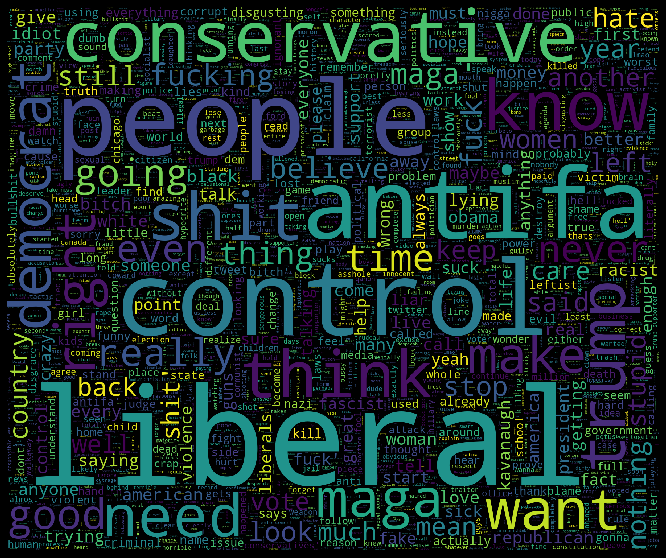

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Plot_Wordcloud(df,columnname,subtask,target):
    nltk.download('stopwords')
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    all_words=' '.join([text for text in df[columnname][df[subtask]==target]])

    wordcloud=WordCloud(stopwords = stop_words,width=1800,height=1500,max_words=100000).generate(all_words)


    plt.figure(figsize=(20,10),facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
Plot_Wordcloud(df,'tidy_tweet','subtask_a','OFF')

# Retrieve Tweets for Subtask B 

In [22]:
df_subtask_b=pd.DataFrame()
df_subtask_b = df.ix[(df['subtask_a'] == 'OFF'),['tidy_tweet','subtask_a','subtask_b','subtask_c']]
df_subtask_b = df_subtask_b.reset_index()
del df_subtask_b['index']
df_subtask_b

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,tidy_tweet,subtask_a,subtask_b,subtask_c
0,'native americans',OFF,UNT,NULL
1,'home drunk #maga #trump',OFF,TIN,IND
2,'someone vetaken piece shit volcano',OFF,UNT,NULL
3,'liberals kookoo',OFF,TIN,OTH
4,'noes tough shit',OFF,UNT,NULL
5,'literally talking mass shootings propaganda u...,OFF,TIN,GRP
6,'canada need another cuck already enough #loon...,OFF,TIN,IND
7,'lying corrupt traitor nobody wants hear anymo...,OFF,TIN,IND
8,'control kids asking',OFF,TIN,OTH
9,'throwing bullshit flag nonsense #putuporshutu...,OFF,TIN,IND


In [25]:
df_subtask_b['tidy_tweet']=df_subtask_b['tidy_tweet'].str.replace("'","")
df_subtask_b

,tidy_tweet,subtask_a,subtask_b,subtask_c
0,native americans,OFF,UNT,NULL
1,home drunk #maga #trump,OFF,TIN,IND
2,someone vetaken piece shit volcano,OFF,UNT,NULL
3,liberals kookoo,OFF,TIN,OTH
4,noes tough shit,OFF,UNT,NULL
5,literally talking mass shootings propaganda us...,OFF,TIN,GRP
6,canada need another cuck already enough #loone...,OFF,TIN,IND
7,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND
8,control kids asking,OFF,TIN,OTH
9,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND


# Stemming and Lemmatization for Subtask B

In [26]:
df_stemming_b=pd.DataFrame()
df_stemming_b['tidy_tweet']=df_subtask_b['tidy_tweet']

df_stemming_b=StemmingAndLemma(df_stemming_b,df_subtask_b)
df_stemming_b


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home drunk #maga #trump,home drunk # maga # trump,home drunk #maga #trump,"[home, drunk, #maga, #trump]",home drunk #maga #trump,home drunk #maga #trump,home drunk #maga #trump
2,someone vetaken piece shit volcano,someon vetaken piec shit volcano,someone vetaken piece shit volcano,"[someone, vetaken, piece, shit, volcano]",someone vetaken piece shit volcano,someone vetaken piece shit volcano,someone vetaken piece shit volcano
3,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
4,noes tough shit,noe tough shit,noes tough shit,"[noes, tough, shit]",noes tough shit,noes tough shit,noes tough shit
5,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
6,canada need another cuck already enough #loone...,canada need anoth cuck alreadi enough # looney...,canada need another cuck already enough #loone...,"[canada, need, another, cuck, already, enough,...",canada need another cuck already enough #loone...,canada need another cuck already enough #loone...,canada need another cuck already enough #loone...
7,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor li...,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
8,control kids asking,control kid ask,control kids ask,"[control, kids, asking]",control kids ask,control kids asking,control kids asking
9,throwing bullshit flag nonsense #putuporshutup...,throw bullshit flag nonsens # putuporshutup # ...,throwing bullshit flag nonsense #putuporshutup...,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...


# Remove words with frequency less than 3

In [27]:
df_stemming_b=frequency(df_stemming_b)
df_stemming_b

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home drunk #maga #trump,home drunk # maga # trump,home drunk #maga #trump,"[home, drunk, #maga, #trump]",home drunk #maga #trump,home drunk #maga #trump,home drunk #maga #trump
2,someone piece shit,someon piec shit,someone piece shit,"[someone, vetaken, piece, shit, volcano]",someone piece shit,someone piece shit,someone piece shit
3,liberals,liber,liberals,"[liberals, kookoo]",liberals,liberals,liberals
4,tough shit,tough shit,tough shit,"[noes, tough, shit]",tough shit,tough shit,tough shit
5,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
6,canada need another already enough #liberals g...,canada need anoth alreadi enough # # liber gre...,canada need another already enough #liberals g...,"[canada, need, another, cuck, already, enough,...",canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...
7,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
8,control kids asking,control kid ask,control kids,"[control, kids, asking]",control kids,control kids asking,control kids asking
9,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga


# Final Updated Tweet's for Subtask_B

In [30]:
df_subtask_b['tidy_tweet_updated']=df_stemming_b['tidy_tweet']
df_subtask_b['word_tokenize']=df_stemming_b['word_tokenize']
df_subtask_b['SnowballStemmer123']=df_stemming_b['SnowballStemmer123']
df_subtask_b['Porter']=df_stemming_b['Porter']
df_subtask_b['Lancaster']=df_stemming_b['Lancaster']
df_subtask_b['Lemmatized']=df_stemming_b['Lemmatized']

df_subtask_b.update("'" + df_subtask_b[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
df_subtask_b

,tidy_tweet,subtask_a,subtask_b,subtask_c,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,'native americans',OFF,UNT,NULL,'native americans','nativ american','native american','native american','native americans','native americans'
1,'home drunk #maga #trump',OFF,TIN,IND,'home drunk #maga #trump','home drunk # maga # trump','home drunk #maga #trump','home drunk #maga #trump','home drunk #maga #trump','home drunk #maga #trump'
2,'someone vetaken piece shit volcano',OFF,UNT,NULL,'someone piece shit','someon piec shit','someone piece shit','someone piece shit','someone piece shit','someone piece shit'
3,'liberals kookoo',OFF,TIN,OTH,'liberals','liber','liberals','liberals','liberals','liberals'
4,'noes tough shit',OFF,UNT,NULL,'tough shit','tough shit','tough shit','tough shit','tough shit','tough shit'
5,'literally talking mass shootings propaganda u...,OFF,TIN,GRP,'literally talking mass shootings propaganda u...,'liter talk mass shoot propaganda use divid ma...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...
6,'canada need another cuck already enough #loon...,OFF,TIN,IND,'canada need another already enough #liberals ...,'canada need anoth alreadi enough # # liber gr...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...
7,'lying corrupt traitor nobody wants hear anymo...,OFF,TIN,IND,'lying corrupt traitor nobody wants hear anymo...,'lie corrupt traitor nobodi want hear anymor l...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...
8,'control kids asking',OFF,TIN,OTH,'control kids asking','control kid ask','control kids','control kids','control kids asking','control kids asking'
9,'throwing bullshit flag nonsense #putuporshutu...,OFF,TIN,IND,'throwing bullshit flag nonsense #kavanaugh #m...,'throw bullshit flag nonsens # # kavanaugh # m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...


In [31]:
f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_subtask_B.arff","a+")
f.write("@relation Test\n")
f.write("@attribute 'tidy_tweet' string\n")
f.write("@attribute 'subtask_a' {NOT,OFF}\n")
f.write("@attribute 'subtask_b' {TIN,UNT,NULL}\n")
f.write("@attribute 'subtask_c' {IND,GRP,OTH,NULL}\n")
f.write("@attribute 'tidy_tweet_updated' string\n")
f.write("@attribute 'word_tokenize' string\n")
f.write("@attribute 'SnowballStemmer123' string\n")
f.write("@attribute 'Porter' string\n")
f.write("@attribute 'Lancaster' string\n")
f.write("@attribute 'Lemmatized' string\n")
f.write("@data\n")
f.close()
df_subtask_b.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_subtask_B.arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')

# WordCloud for Subtask B

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


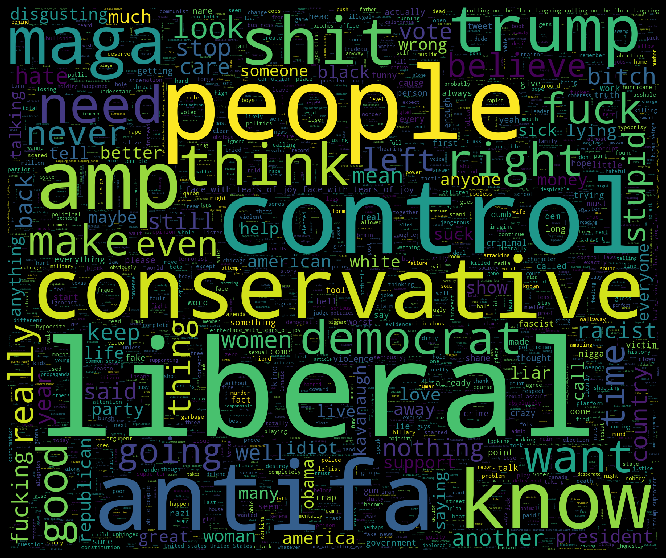

In [67]:
Plot_Wordcloud(df_subtask_b,'tidy_tweet','subtask_b','TIN')

# Retrieve Tweets for Subtask C

In [46]:
df_subtask_c=pd.DataFrame()
df_subtask_c = df_subtask_b.ix[(df_subtask_b['subtask_b'] == 'TIN'),['tidy_tweet','subtask_a','subtask_b','subtask_c']]
df_subtask_c = df_subtask_c.reset_index()
del df_subtask_c['index']

df_subtask_c

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,tidy_tweet,subtask_a,subtask_b,subtask_c
0,''home drunk #maga #trump'',OFF,TIN,IND
1,''liberals kookoo'',OFF,TIN,OTH
2,''literally talking mass shootings propaganda ...,OFF,TIN,GRP
3,''canada need another cuck already enough #loo...,OFF,TIN,IND
4,''lying corrupt traitor nobody wants hear anym...,OFF,TIN,IND
5,''control kids asking'',OFF,TIN,OTH
6,''throwing bullshit flag nonsense #putuporshut...,OFF,TIN,IND
7,''kind conservatives wanna associate everyone ...,OFF,TIN,GRP
8,''fuck going people room women room pick stick'',OFF,TIN,GRP
9,''days people general connect people days anno...,OFF,TIN,IND


In [47]:
df_subtask_c['tidy_tweet']=df_subtask_c['tidy_tweet'].str.replace("'","")
df_subtask_c

,tidy_tweet,subtask_a,subtask_b,subtask_c
0,home drunk #maga #trump,OFF,TIN,IND
1,liberals kookoo,OFF,TIN,OTH
2,literally talking mass shootings propaganda us...,OFF,TIN,GRP
3,canada need another cuck already enough #loone...,OFF,TIN,IND
4,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND
5,control kids asking,OFF,TIN,OTH
6,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND
7,kind conservatives wanna associate everyone le...,OFF,TIN,GRP
8,fuck going people room women room pick stick,OFF,TIN,GRP
9,days people general connect people days annoyance,OFF,TIN,IND


# Stemming and Lemmatization for Subtask C

In [48]:
df_stemming_c=pd.DataFrame()
df_stemming_c['tidy_tweet']=df_subtask_c['tidy_tweet']

df_stemming_c=StemmingAndLemma(df_stemming_c,df_subtask_c)
df_stemming_c

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,home drunk #maga #trump,home drunk # maga # trump,home drunk #maga #trump,"[home, drunk, #maga, #trump]",home drunk #maga #trump,home drunk #maga #trump,home drunk #maga #trump
1,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
2,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
3,canada need another cuck already enough #loone...,canada need anoth cuck alreadi enough # looney...,canada need another cuck already enough #loone...,"[canada, need, another, cuck, already, enough,...",canada need another cuck already enough #loone...,canada need another cuck already enough #loone...,canada need another cuck already enough #loone...
4,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor li...,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
5,control kids asking,control kid ask,control kids ask,"[control, kids, asking]",control kids ask,control kids asking,control kids asking
6,throwing bullshit flag nonsense #putuporshutup...,throw bullshit flag nonsens # putuporshutup # ...,throwing bullshit flag nonsense #putuporshutup...,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...
7,kind conservatives wanna associate everyone le...,kind conserv wan na associ everyon left commun...,kind conservatives wanna associate everyone le...,"[kind, conservatives, wanna, associate, everyo...",kind conservatives wanna associate everyone le...,kind conservatives wanna associate everyone le...,kind conservatives wanna associate everyone le...
8,fuck going people room women room pick stick,fuck go peopl room women room pick stick,fuck going people room women room pick stick,"[fuck, going, people, room, women, room, pick,...",fuck going people room women room pick stick,fuck going people room women room pick stick,fuck going people room women room pick stick
9,days people general connect people days annoyance,day peopl gener connect peopl day annoy,days people general connect people days annoy,"[days, people, general, connect, people, days,...",days people general connect people days annoy,days people general connect people days annoyance,days people general connect people days annoyance


# Remove words with frequency less than 3

In [49]:
df_stemming_c=frequency(df_stemming_c)
df_stemming_c

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,home drunk #maga #trump,home drunk # maga # trump,home drunk #maga #trump,"[home, drunk, #maga, #trump]",home drunk #maga #trump,home drunk #maga #trump,home drunk #maga #trump
1,liberals,liber,liberals,"[liberals, kookoo]",liberals,liberals,liberals
2,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
3,canada need another already enough #liberals g...,canada need anoth alreadi enough # # liber gre...,canada need another already enough #liberals g...,"[canada, need, another, cuck, already, enough,...",canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...
4,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
5,control kids asking,control kid ask,control kids,"[control, kids, asking]",control kids,control kids asking,control kids asking
6,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga
7,kind conservatives wanna everyone left communi...,kind conserv wan na associ everyon left commun...,kind conservatives wanna everyone left communi...,"[kind, conservatives, wanna, associate, everyo...",kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...
8,fuck going people room women room pick stick,fuck go peopl room women room pick stick,fuck going people room women room pick stick,"[fuck, going, people, room, women, room, pick,...",fuck going people room women room pick stick,fuck going people room women room pick stick,fuck going people room women room pick stick
9,days people general people days,day peopl gener connect peopl day annoy,days people general people days,"[days, people, general, connect, people, days,...",days people general people days,days people general people days,days people general people days


# Final Updated Tweet's for Subtask_C

In [50]:
df_subtask_c['tidy_tweet_updated']=df_stemming_c['tidy_tweet']
df_subtask_c['word_tokenize']=df_stemming_c['word_tokenize']
df_subtask_c['SnowballStemmer123']=df_stemming_c['SnowballStemmer123']
df_subtask_c['Porter']=df_stemming_c['Porter']
df_subtask_c['Lancaster']=df_stemming_c['Lancaster']
df_subtask_c['Lemmatized']=df_stemming_c['Lemmatized']
df_subtask_c.update("'" + df_subtask_c[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")

df_subtask_c

,tidy_tweet,subtask_a,subtask_b,subtask_c,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,'home drunk #maga #trump',OFF,TIN,IND,'home drunk #maga #trump','home drunk # maga # trump','home drunk #maga #trump','home drunk #maga #trump','home drunk #maga #trump','home drunk #maga #trump'
1,'liberals kookoo',OFF,TIN,OTH,'liberals','liber','liberals','liberals','liberals','liberals'
2,'literally talking mass shootings propaganda u...,OFF,TIN,GRP,'literally talking mass shootings propaganda u...,'liter talk mass shoot propaganda use divid ma...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...,'literally talking mass shootings propaganda u...
3,'canada need another cuck already enough #loon...,OFF,TIN,IND,'canada need another already enough #liberals ...,'canada need anoth alreadi enough # # liber gr...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...,'canada need another already enough #liberals ...
4,'lying corrupt traitor nobody wants hear anymo...,OFF,TIN,IND,'lying corrupt traitor nobody wants hear anymo...,'lie corrupt traitor nobodi want hear anymor l...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...,'lying corrupt traitor nobody wants hear anymo...
5,'control kids asking',OFF,TIN,OTH,'control kids asking','control kid ask','control kids','control kids','control kids asking','control kids asking'
6,'throwing bullshit flag nonsense #putuporshutu...,OFF,TIN,IND,'throwing bullshit flag nonsense #kavanaugh #m...,'throw bullshit flag nonsens # # kavanaugh # m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...,'throwing bullshit flag nonsense #kavanaugh #m...
7,'kind conservatives wanna associate everyone l...,OFF,TIN,GRP,'kind conservatives wanna everyone left commun...,'kind conserv wan na associ everyon left commu...,'kind conservatives wanna everyone left commun...,'kind conservatives wanna everyone left commun...,'kind conservatives wanna everyone left commun...,'kind conservatives wanna everyone left commun...
8,'fuck going people room women room pick stick',OFF,TIN,GRP,'fuck going people room women room pick stick','fuck go peopl room women room pick stick','fuck going people room women room pick stick','fuck going people room women room pick stick','fuck going people room women room pick stick','fuck going people room women room pick stick'
9,'days people general connect people days annoy...,OFF,TIN,IND,'days people general people days','day peopl gener connect peopl day annoy','days people general people days','days people general people days','days people general people days','days people general people days'


In [51]:
f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_subtask_C.arff","a+")
f.write("@relation Test\n")
f.write("@attribute 'tidy_tweet' string\n")
f.write("@attribute 'subtask_a' {NOT,OFF}\n")
f.write("@attribute 'subtask_b' {TIN,UNT,NULL}\n")
f.write("@attribute 'subtask_c' {IND,GRP,OTH,NULL}\n")
f.write("@attribute 'tidy_tweet_updated' string\n")
f.write("@attribute 'word_tokenize' string\n")
f.write("@attribute 'SnowballStemmer123' string\n")
f.write("@attribute 'Porter' string\n")
f.write("@attribute 'Lancaster' string\n")
f.write("@attribute 'Lemmatized' string\n")
f.write("@data\n")
f.close()
df_subtask_c.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_subtask_C.arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')

# WordCloud for Subtask C

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


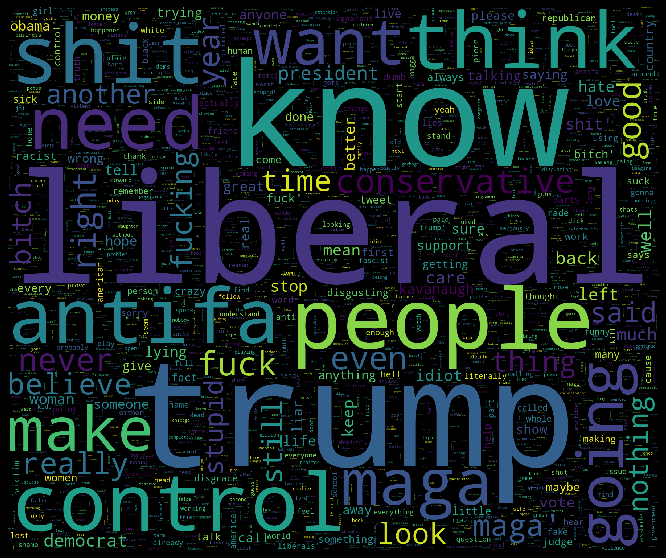

In [52]:
Plot_Wordcloud(df_subtask_c,'tidy_tweet','subtask_c','IND')

# Test File


In [75]:
df_test_a=pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\DMTA\test_a.csv',sep=',', encoding="utf-8",quotechar='\0')

In [76]:
df_test_a

,id,tweet,subtask_a
0,15923,'#whoisq #wherestheserver #dumpnike #declasfis...,OFF
1,27014,'#constitutionday revered conservatives hated ...,NOT
2,30530,'#foxnews #nra #maga #potus #trump ndamendment...,NOT
3,13876,'#watching #boomer getting news that still par...,NOT
4,60133,'#nopasaran unity demo oppose right #london #a...,OFF
5,83681,'what fuck this time',OFF
6,96874,'#rap form used express yourself freely does g...,NOT
7,65507,'feeling kissing behind humiliate later',OFF
8,78910,'tips enhance audience connection facebook #so...,NOT
9,46363,'#biggbosstamil janani task going first final ...,NOT


In [77]:
df_test_a=preparation(df_test_a)
df_test_a

0
1


C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel i

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

,id,tweet,subtask_a,tidy_tweet
0,15923,'#whoisq #wherestheserver #dumpnike #declasfis...,OFF,#whoisq #wherestheserver #dumpnike #declasfisa...
1,27014,'#constitutionday revered conservatives hated ...,NOT,#constitutionday revered conservatives hated p...
2,30530,'#foxnews #nra #maga #potus #trump ndamendment...,NOT,#foxnews #nra #maga #potus #trump ndamendment ...
3,13876,'#watching #boomer getting news that still par...,NOT,#watching #boomer getting news that still paro...
4,60133,'#nopasaran unity demo oppose right #london #a...,OFF,#nopasaran unity demo oppose right #london #an...
5,83681,'what fuck this time',OFF,what fuck this time
6,96874,'#rap form used express yourself freely does g...,NOT,#rap form used express yourself freely does gr...
7,65507,'feeling kissing behind humiliate later',OFF,feeling kissing behind humiliate later
8,78910,'tips enhance audience connection facebook #so...,NOT,tips enhance audience connection facebook #soc...
9,46363,'#biggbosstamil janani task going first final ...,NOT,#biggbosstamil janani task going first final list


# Remove Stop Words


In [78]:
def remove_stopwords_test(df_test):
    nltk.download('stopwords')
    without_wordlist=[]
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    for i in range(len(df_test)):
        querywords = df_test['tidy_tweet'][i].split()
        resultwords  = [word for word in querywords if word.lower() not in stop_words]
        without_wordlist.append(' '.join(resultwords))

    df_test['tidy_tweet'] = without_wordlist

    return df_test

In [79]:
df_test_a=remove_stopwords_test(df_test_a)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming and Lemmatization

In [80]:
df_stemming_test_a=pd.DataFrame()
df_stemming_test_a['tidy_tweet']=df_test_a['tidy_tweet']

df_stemming_test_a=StemmingAndLemma(df_stemming_test_a,df_test_a)
df_stemming_test_a

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,#whoisq #wherestheserver #dumpnike #declasfisa...,# whoisq # wherestheserv # dumpnik # declasfis...,#whoisq #wherestheserver #dumpnike #declasfisa...,"[#whoisq, #wherestheserver, #dumpnike, #declas...",#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...,#whoisq #wherestheserver #dumpnike #declasfisa...
1,#constitutionday revered conservatives hated p...,# constitutionday rever conserv hate progress ...,#constitutionday revered conservatives hated p...,"[#constitutionday, revered, conservatives, hat...",#constitutionday revered conservatives hated p...,#constitutionday revered conservatives hated p...,#constitutionday revered conservatives hated p...
2,#foxnews #nra #maga #potus #trump ndamendment ...,# foxnew # nra # maga # potu # trump ndamend #...,#foxnews #nra #maga #potus #trump ndamendment ...,"[#foxnews, #nra, #maga, #potus, #trump, ndamen...",#foxnews #nra #maga #potus #trump ndamendment ...,#foxnews #nra #maga #potus #trump ndamendment ...,#foxnews #nra #maga #potus #trump ndamendment ...
3,#watching #boomer getting news still parole al...,# watch # boomer get news still parol alway ma...,#watching #boomer getting news still parole al...,"[#watching, #boomer, getting, news, still, par...",#watching #boomer getting news still parole al...,#watching #boomer getting news still parole al...,#watching #boomer getting news still parole al...
4,#nopasaran unity demo oppose right #london #an...,# nopasaran uniti demo oppos right # london # ...,#nopasaran unity demo oppose right #london #an...,"[#nopasaran, unity, demo, oppose, right, #lond...",#nopasaran unity demo oppose right #london #an...,#nopasaran unity demo oppose right #london #an...,#nopasaran unity demo oppose right #london #an...
5,fuck time,fuck time,fuck tim,"[fuck, time]",fuck tim,fuck time,fuck time
6,#rap form used express freely green light excu...,# rap form use express freeli green light excu...,#rap form used express freely green light excu...,"[#rap, form, used, express, freely, green, lig...",#rap form used express freely green light excu...,#rap form used express freely green light excu...,#rap form used express freely green light excu...
7,feeling kissing behind humiliate later,feel kiss behind humili later,feeling kissing behind humiliate lat,"[feeling, kissing, behind, humiliate, later]",feeling kissing behind humiliate lat,feeling kissing behind humiliate later,feeling kissing behind humiliate later
8,tips enhance audience connection facebook #soc...,tip enhanc audienc connect facebook # socialme...,tips enhance audience connection facebook #soc...,"[tips, enhance, audience, connection, facebook...",tips enhance audience connection facebook #soc...,tips enhance audience connection facebook #soc...,tips enhance audience connection facebook #soc...
9,#biggbosstamil janani task going first final list,# biggbosstamil janani task go first final list,#biggbosstamil janani task going first final list,"[#biggbosstamil, janani, task, going, first, f...",#biggbosstamil janani task going first final list,#biggbosstamil janani task going first final list,#biggbosstamil janani task going first final list


In [81]:
df_test_a['tidy_tweet_updated']=df_stemming_test_a['tidy_tweet']
df_test_a['word_tokenize']=df_stemming_test_a['word_tokenize']
df_test_a['SnowballStemmer123']=df_stemming_test_a['SnowballStemmer123']
df_test_a['Porter']=df_stemming_test_a['Porter']
df_test_a['Lancaster']=df_stemming_test_a['Lancaster']
df_test_a['Lemmatized']=df_stemming_test_a['Lemmatized']
df_test_a.update("'" + df_test_a[['tidy_tweet','tidy_tweet_updated','word_tokenize','SnowballStemmer123','Porter','Lancaster','Lemmatized']].astype(str) + "'")
del df_test_a['id']
del df_test_a['tweet']
df_test_a

,subtask_a,tidy_tweet,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,OFF,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'# whoisq # wherestheserv # dumpnik # declasfi...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...,'#whoisq #wherestheserver #dumpnike #declasfis...
1,NOT,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...,'# constitutionday rever conserv hate progress...,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...,'#constitutionday revered conservatives hated ...
2,NOT,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...,'# foxnew # nra # maga # potu # trump ndamend ...,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...,'#foxnews #nra #maga #potus #trump ndamendment...
3,NOT,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...,'# watch # boomer get news still parol alway m...,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...,'#watching #boomer getting news still parole a...
4,OFF,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'# nopasaran uniti demo oppos right # london #...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...,'#nopasaran unity demo oppose right #london #a...
5,OFF,'fuck time','fuck time','fuck time ','fuck tim','fuck tim','fuck time','fuck time'
6,NOT,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...,'# rap form use express freeli green light exc...,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...,'#rap form used express freely green light exc...
7,OFF,'feeling kissing behind humiliate later','feeling kissing behind humiliate later','feel kiss behind humili later ','feeling kissing behind humiliate lat','feeling kissing behind humiliate lat','feeling kissing behind humiliate later','feeling kissing behind humiliate later'
8,NOT,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...,'tip enhanc audienc connect facebook # socialm...,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...,'tips enhance audience connection facebook #so...
9,NOT,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...,'# biggbosstamil janani task go first final li...,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...,'#biggbosstamil janani task going first final ...


In [83]:
f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\test_subtask_A.arff","a+")
f.write("@relation Test\n")
f.write("@attribute 'subtask_a' {NOT,OFF}\n")
f.write("@attribute 'tidy_tweet' string\n")
f.write("@attribute 'tidy_tweet_updated' string\n")
f.write("@attribute 'word_tokenize' string\n")
f.write("@attribute 'SnowballStemmer123' string\n")
f.write("@attribute 'Porter' string\n")
f.write("@attribute 'Lancaster' string\n")
f.write("@attribute 'Lemmatized' string\n")
f.write("@data\n")
f.close()
df_test_a.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\test_subtask_A.arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')